In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=yf.download('^GDAXI',start='2019-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200
...,...,...,...,...,...,...
2022-09-05,12827.580078,12827.580078,12617.400391,12760.780273,12760.780273,62869400
2022-09-06,12807.269531,12927.790039,12760.040039,12871.440430,12871.440430,53636500
2022-09-07,12770.719727,12953.990234,12736.089844,12915.969727,12915.969727,67128300


In [3]:
df['MA20']=df['Adj Close'].rolling(20).mean()
df['MA50']=df['Adj Close'].rolling(50).mean()

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700,NaN,NaN
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800,NaN,NaN
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500,NaN,NaN
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400,NaN,NaN
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-09-05,12827.580078,12827.580078,12617.400391,12760.780273,12760.780273,62869400,13317.014453,13188.188574
2022-09-06,12807.269531,12927.790039,12760.040039,12871.440430,12871.440430,53636500,13283.837988,13180.980977
2022-09-07,12770.719727,12953.990234,12736.089844,12915.969727,12915.969727,67128300,13244.589990,13179.233379


In [5]:
df=df[['Adj Close','MA20','MA50']]
df

,Adj Close,MA20,MA50
Date,,,
2019-01-02,10580.190430,NaN,NaN
2019-01-03,10416.660156,NaN,NaN
2019-01-04,10767.690430,NaN,NaN
2019-01-07,10747.809570,NaN,NaN
2019-01-08,10803.980469,NaN,NaN
...,...,...,...
2022-09-05,12760.780273,13317.014453,13188.188574
2022-09-06,12871.440430,13283.837988,13180.980977
2022-09-07,12915.969727,13244.589990,13179.233379


In [6]:
Buy=[]
Sell=[]
for i in range(len(df)):
    if df.MA20.iloc[i]>df.MA50.iloc[i] \
    and df.MA20.iloc[i-1]< df.MA50.iloc[i-1]:
        Buy.append(i)

    elif df.MA20.iloc[i] < df.MA50.iloc[i]\
    and df.MA20.iloc[i-1]> df.MA50.iloc[i-1]:
        Sell.append(i)

In [7]:
Buy

[124, 181, 337, 481, 662, 720, 768, 838, 869, 916]

In [8]:
Sell

[108, 151, 292, 447, 650, 689, 748, 784, 845, 879, 937]

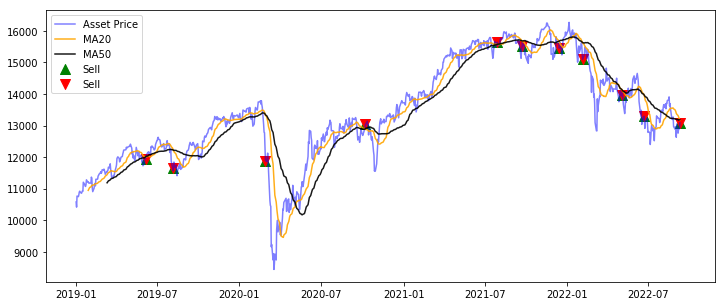

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df['Adj Close'],label='Asset Price',c='Blue',alpha=0.5)
plt.plot(df['MA20'],label='MA20',C='orange',alpha=0.9)
plt.plot(df['MA50'],label='MA50',c='K',alpha=0.9)
plt.scatter(df.iloc[Sell]['Adj Close'].index,df.iloc[Sell]['Adj Close'],label='Sell',c='g',marker='^',s=100)
plt.scatter(df.iloc[Sell]['Adj Close'].index,df.iloc[Sell]['Adj Close'],label='Sell',c='r',marker='v',s=100)
plt.legend()
plt.show()

In [10]:
df.iloc[Sell]['Adj Close']

Date
2019-06-06    11953.139648
2019-08-07    11650.150391
2020-02-28    11890.349609
2020-10-08    13042.209961
2021-07-29    15640.469727
2021-09-22    15506.740234
2021-12-14    15453.559570
2022-02-04    15099.559570
2022-05-04    13970.820312
2022-06-21    13292.400391
2022-09-09    13088.209961
Name: Adj Close, dtype: float64